# Week_3_HW
## 依照寄送方式探討訂單平均消費金額及交易狀態

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../Orders.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [48]:
df.DeliverTypeDef.unique()
df.StatusDef.unique()

array(['Finish', 'Overdue', 'Cancel', 'ReturnGoods', 'WaitingToShipping',
       'CreditCheckFail'], dtype=object)

In [6]:
cart_data = df.groupby(["DeliverTypeDef", "OrderGroupCode"])

In [9]:
cart_df = pd.DataFrame()
cart_df["SalesOrderSlaveTotalPayment"] = cart_data['SalesOrderSlaveTotalPayment'].sum()
cart_df["PromotionDiscount"] = cart_data["PromotionDiscount"].sum()
cart_df["StatusDef"] = cart_data["StatusDef"].first()

In [10]:
cart_df

SalesOrderSlaveTotalPayment  \
DeliverTypeDef OrderGroupCode                                                                    
Family         b"  y!'[+Jr\xd6\xd2D@\x1e\xee\x17lm\xca\xda"                              837.0   
               b" #\xa6'/\x82\xe7`\xb6\xb6\xfd\xa9p\x9cIr\x11\...                        647.0   
               b" #\xfeH\xbc\xeb2\x1a\xd8\xd5n\x0b'\x0e6CEf\xf6e"                        690.0   
               b" $_\xf1\xaf\xaa\x11~\x8c\xe4nj\xde#\x06'\xf7\...                        500.0   
               b" ''\xc9\x13I\x0e\x88\x13\x95\xb6\x8f\x0e\xeb\...                       2587.0   
               b" ')\xdd\x1e\x0f\x9d\xf7\x13\x047l\x98\x84\xba...                        507.0   
               b" ',\xbb\xd9\xde\x06\t\xc4\x11ZP\x89\xdaU#\xa6...                        582.0   
               b" '\n\x8b\xdfh2\xbe\x82\xf6\x8f\xea\x1b\x07\xe...                        649.0   
               b" '\x0b'\xac<\xb52\x1ar\xcfX\x98:\xa2\xea\xdf\...                        796.0   
               b" '\x15\xa0\x15\xea\x8f\xc5\xe6\xedk\xba\x0cP\...                        629.0   
               b" '|\x06S\xbed\\g\x1a\xca\n-a\x9e\xe7\x15DL\xc9"                        2636.0   
               b" ,B\xd9C\xcf*\xa1',/\xcb{\xe6\xf4z\xbd\xcc\x8...                       1165.0   
               b" ,h\xc0\xe1\x1d2\x93)'\xf2\xfb\xd7\xf4\xba\xb...                        435.0   
               b" -\x04\x85\xb6\xd3'\xf4\x10\xc2\x01\xd8\xc2\x...                        688.0   
               b" /\x0f\xa5\xe7\xa3?\x87\x19\xe2D5\n\x1d'\x05\...                       2119.0   
               b" /\xa1'\xfd\xd0b\x94\xa0q0\n\xee{h\xd4\xf7\xd...                        698.0   
               b" 1_\xc9\xaf\x15'\x01\\\xc2\xebAq\x1a\x91\xd60...                       1105.0   
               b" 2P(\xd2\xd2\x05\x81)n\xa5\x15\xbb\x9b'\xd2K\...                        868.0   
               b" 3\x7f\x87\xfb\x95\xc3\xfb\xc7\x86\x8d\x8cd\x...                       1211.0   
               b" 50\xf2\xe9\xbb\xca'\xfb\x1a}\x91\xd1\x94\x0f...                        774.0   
               b" 5N\x02'S\xb0\xf9\x18\xfeNP\xe9h\x0f\xd1\xc1x...                       1430.0   
               b" 6\xb1^\xf2S\x18\xe6\xc9saU'#\xb4Q\xc9\xac\\\...                        450.0   
               b" 8\x1e\xf1/\xdcB\x0e't\xe4\xc5\x0fy \x0f\x01H...                        295.0   
               b" 8\xa7\xd3\x19\x91\x96q\x13I.\xac\xb3\xa9\xe5...                        998.0   
               b" ?%J\xfb\xa9n\x0b\xa0%\xa7\xd8'\x11\xcf\xf9\x...                        529.0   
               b" ?'\t1\x9a\xe5\x96\x99\x94\xe5q\xa5j\xf5\xb1\...                        739.0   
               b" @\x1dZ\xbd\xc0\xc5\xaa\xc0\xa2\xa1\xba\x0f'\...                       1294.0   
               b" B\x8a3\x8f\xfc\xf2\xa1\x9ez\x84\xe9`\x06tZ'\...                        988.0   
               b" E\xe6\x1f\x18E\xac\xf8\xe9\x88\xf9\xc3\x19\x...                       1515.0   
               b" Ed\x1f>\x01'\x9c\xa32]0\x86\xdcyr\x8b{}b"                              988.0   
...                                                                                        ...   
SevenEleven    b'~{\xc7xt\xe0Y\xe04X\xd0\xe6S\x1cc\x1d\xe4\xd2...                        667.0   
               b'~{\xee\xdc\x92\xb0x\xe3w\x1b\xcf\x17\xcb\xd5\...                        298.0   
               b'~{]|1c^/\x9dG\xd1\xdc\xe9#\xa3Q)Aw\xde'                                 548.0   
               b'~{am\xa6\x06\xe5\xae\x84\xad\xe3\xaaU\xdb\xd9...                       1294.0   
               b'~{p\xe0\x14^CT}\xc6\xa4\x81\xf0+\nb\xe5a\xae('                          350.0   
               b'~|\x08\x9bb\xb7\xe4H\x8b\xc1[\xe5S\xc8\xf8\xb...                       1107.0   
               b'~|\x17\x1b\xc4\xe2\xc3\x84\xae&V4\x06S\xc3\xe...                        754.0   
               b'~|\x80\x16*~:Y\x9d\x93\xf53\xf2|\x03\x85\xd6\...                       1654.0   
               b'~|\xc4,\xc1\xda \x97Yo9\xbe\xebm

In [21]:
sevenEleven_data = cart_df.groupby(['DeliverTypeDef']).get_group('SevenEleven')

In [22]:
sevenEleven_data.head(3)

SalesOrderSlaveTotalPayment  \
DeliverTypeDef OrderGroupCode                                                                    
SevenEleven    b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"                        921.0   
               b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x...                       1583.0   
               b" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}"                        520.0   

                                                                   PromotionDiscount  \
DeliverTypeDef OrderGroupCode                                                          
SevenEleven    b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"             -140.0   
               b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x...             -100.0   
               b" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}"                0.0   

                                                                  StatusDef  
DeliverTypeDef OrderGroupCode                                                
SevenEleven    b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"    Finish  
               b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x...    Finish  
               b" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}"    Finish

In [26]:
sevenEleven_avg_payment = sevenEleven_data["SalesOrderSlaveTotalPayment"].mean()
sevenEleven_avg_discount = sevenEleven_data["PromotionDiscount"].mean()
sevenEleven_value_counts = sevenEleven_data["StatusDef"].value_counts()
print(sevenEleven_avg_payment)
print(sevenEleven_avg_discount)
print(sevenEleven_value_counts)

936.2724328009691
-97.60338794412533
Finish               566187
Cancel                99677
Overdue               46606
ReturnGoods           29572
WaitingToShipping       119
Name: StatusDef, dtype: int64


In [27]:
family_data = cart_df.groupby(['DeliverTypeDef']).get_group('Family')

In [28]:
family_avg_payment = family_data["SalesOrderSlaveTotalPayment"].mean()
family_avg_discount = family_data["PromotionDiscount"].mean()
family_value_counts = family_data["StatusDef"].value_counts()
print(family_avg_payment)
print(family_avg_discount)
print(family_value_counts)

950.5401928560975
-100.74252959486772
Finish               375253
Cancel                73629
Overdue               34848
ReturnGoods           21857
WaitingToShipping        75
Name: StatusDef, dtype: int64


In [16]:
home_data = cart_df.groupby(['DeliverTypeDef']).get_group('Home')

In [29]:
home_avg_payment = home_data["SalesOrderSlaveTotalPayment"].mean()
home_avg_discount = home_data["PromotionDiscount"].mean()
home_value_counts = home_data["StatusDef"].value_counts()
print(home_avg_payment)
print(home_avg_discount)
print(home_value_counts)

1235.1203192142418
-153.24889970971066
Finish               77198
ReturnGoods          10337
Cancel                8419
CreditCheckFail        151
WaitingToShipping        6
Name: StatusDef, dtype: int64


([<matplotlib.axis.XTick at 0x11036f4e0>,
 <a list of 3 Text xticklabel objects>)

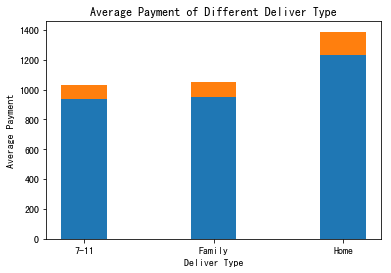

In [18]:
N = 3
totalPaymentMeans = (sevenEleven_avg_payment, family_avg_payment, home_avg_payment)
discountMeans = (-sevenEleven_avg_discount, -family_avg_discount, -home_avg_discount)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, totalPaymentMeans, width)
p2 = plt.bar(ind, discountMeans, width,
             bottom=totalPaymentMeans)

plt.ylabel('Average Payment')
plt.xlabel("Deliver Type")
plt.title("Average Payment of Different Deliver Type")
plt.xticks(ind, ('7-11', 'Family', 'Home'))

In [68]:
pie_lables = ['Finish', 'Overdue', 'Cancel', 'ReturnGoods', 'WaitingToShipping', 'CreditCheckFail']

In [69]:
def getStatusDefCounts(statusDef):
    data = eval(statusDef + "_value_counts")
    array = eval(statusDef + "_size")
    for key in pie_lables:
        try:
            array.append(data[key])
        except:
            array.append(0)
            print("no " + key + " key")

In [70]:
sevenEleven_size = []
getStatusDefCounts("sevenEleven")
sevenEleven_size

no CreditCheckFail key


[566187, 46606, 99677, 29572, 119, 0]

In [71]:
family_size = []
getStatusDefCounts("family")
family_size

no CreditCheckFail key


[375253, 34848, 73629, 21857, 75, 0]

In [72]:
home_size = []
getStatusDefCounts("home")
home_size

no Overdue key


[77198, 0, 8419, 10337, 6, 151]

([<matplotlib.patches.Wedge at 0x122c1d6a0>,
 [Text(-0.808668,0.745691,'Finish'),
  Text(0.302165,-1.05768,'Overdue'),
  Text(0.859944,-0.685928,'Cancel'),
  Text(1.09125,-0.138437,'ReturnGoods'),
  Text(1.1,-0.000554011,'WaitingToShipping'),
  Text(1.1,9.34347e-08,'CreditCheckFail')],
 [Text(-0.441092,0.406741,'76.3%'),
  Text(0.164818,-0.576919,'6.3%'),
  Text(0.46906,-0.374142,'13.4%'),
  Text(0.595229,-0.0755112,'4.0%'),
  Text(0.6,-0.000302188,'0.0%'),
  Text(0.6,5.09644e-08,'0.0%')])

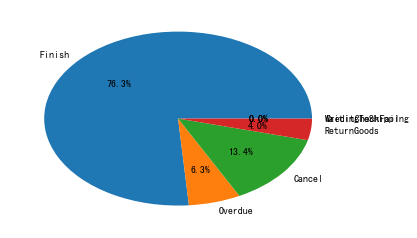

In [74]:
plt.pie(sevenEleven_size , labels = pie_lables, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1233ab5c0>,
 [Text(-0.758282,0.796874,'Finish'),
  Text(0.18272,-1.08472,'Overdue'),
  Text(0.819718,-0.733527,'Cancel'),
  Text(1.08973,-0.14993,'ReturnGoods'),
  Text(1.1,-0.000512469,'WaitingToShipping'),
  Text(1.1,8.911e-08,'CreditCheckFail')],
 [Text(-0.413608,0.434659,'74.2%'),
  Text(0.0996656,-0.591664,'6.9%'),
  Text(0.447119,-0.400106,'14.6%'),
  Text(0.594401,-0.0817801,'4.3%'),
  Text(0.6,-0.000279529,'0.0%'),
  Text(0.6,4.86055e-08,'0.0%')])

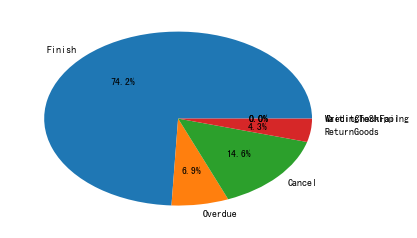

In [75]:
plt.pie(family_size , labels = pie_lables, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x12353d0b8>,
 [Text(-0.896408,0.637537,'Finish'),
  Text(0.360995,-1.03908,'Overdue'),
  Text(0.629763,-0.901886,'Cancel'),
  Text(1.03401,-0.375276,'ReturnGoods'),
  Text(1.09994,-0.0110742,'WaitingToShipping'),
  Text(1.09999,-0.00542934,'CreditCheckFail')],
 [Text(-0.48895,0.347747,'80.3%'),
  Text(0.196906,-0.56677,'0.0%'),
  Text(0.343507,-0.491938,'8.8%'),
  Text(0.564003,-0.204696,'10.8%'),
  Text(0.59997,-0.0060405,'0.0%'),
  Text(0.599993,-0.00296146,'0.2%')])

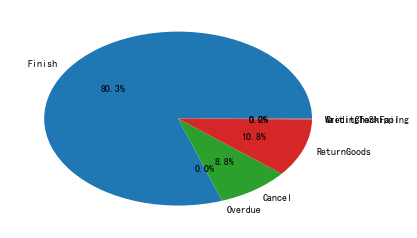

In [76]:
plt.pie(home_size , labels = pie_lables, autopct='%1.1f%%')